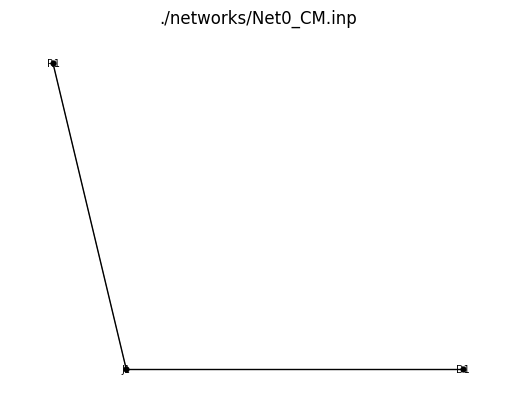

<Axes: title={'center': './networks/Net0_CM.inp'}>

In [1]:
import wntr
import wntr_quantum
import numpy as np

# Create a water network model
inp_file = './networks/Net0_CM.inp'
# inp_file = './networks/Net2LoopsDW.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)

In [2]:
from wntr_quantum.sim.solvers.qubo_polynomial_solver import QuboPolynomialSolver
from qubops.solution_vector import SolutionVector_V2 as SolutionVector
from qubops.encodings import  RangedEfficientEncoding, PositiveQbitEncoding

nqbit = 7
step = (0.5/(2**nqbit-1))
flow_encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+1.5, var_base_name="x")

nqbit = 7
step = (5/(2**nqbit-1))
head_encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+95.0, var_base_name="x")

In [20]:
from wntr_quantum.design.qubo_pipe_diam import QUBODesignPipeDiameter 
pipe_diameters = [250, 500, 1000]
designer = QUBODesignPipeDiameter(wn, flow_encoding, head_encoding, pipe_diameters, head_lower_bound=97)

In [21]:
designer.verify_encoding()

Head Encoding : 95.000000 => 100.000000 (res: 0.039370)
Flow Encoding : 1.500000 => 2.000000 (res: 0.003937)


In [22]:
designer.compute_classical_solution([1,0,0,1,0,0], convert_to_si=False)

array([ 1.766,  1.766, 67.877, 37.329])

In [23]:
designer.enumerates_classical_solutions(convert_to_si=False)

price 	 diameters 	 variables
0.16907910944516957 [250. 250.] [ 1.766  1.766 67.877 37.329]
0.25361866416775436 [250. 500.] [ 1.766  1.766 67.877 67.118]
0.42269777361292393 [ 250. 1000.] [ 1.766  1.766 67.877 67.858]
0.25361866416775436 [500. 250.] [ 1.766  1.766 97.666 67.118]
0.33815821889033915 [500. 500.] [ 1.766  1.766 97.666 96.906]
0.5072373283355087 [ 500. 1000.] [ 1.766  1.766 97.666 97.647]
0.42269777361292393 [1000.  250.] [ 1.766  1.766 98.406 67.858]
0.5072373283355087 [1000.  500.] [ 1.766  1.766 98.406 97.647]
0.6763164377806783 [1000. 1000.] [ 1.766  1.766 98.406 98.387]


In [24]:
from dwave.samplers import SimulatedAnnealingSampler
options = {'sampler': SimulatedAnnealingSampler()}
status = designer.solve(strength=1E5, num_reads=10000, options=options)

[1.7086614173228345, 1.7283464566929132, 97.79527559055119, 97.00787401574803]


In [25]:
designer.total_pice

0.33815821889033915

In [26]:
designer.optimal_diameters

array([500., 500.])